# Importing Required Libraires

In [1]:
# String processing libraries
import re
import string
from cleantext import clean
import emoji

# Data wrangling libraries
import pandas as pd
import numpy as np

# Data Visualisation Libraries
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Natural language peocessing libraries
import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Rules based Sentiment analysis tools
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Dataprep for modelling libraries\
from sklearn.model_selection import train_test_split

# machine learning stylus 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [2]:
# nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")

# Importing data used for Analysis

In [3]:
data = pd.read_csv('data/tiktok_google_play_reviews.csv')

C:\Users\gsamu\AppData\Local\Temp\ipykernel_20696\2509933536.py:1: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('data/tiktok_google_play_reviews.csv')


In [4]:
data.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,68ccaec8-1415-4301-a85e-3004679a3a83,Cassie Moore,https://play-lh.googleusercontent.com/a/ALm5wu...,No words,5,0,27.1.3,2022-11-29 21:55:37,NaN,NaN
1,d84cbfd3-6aa3-485c-aaf9-c5dca27dc966,Kaleb Plummer,https://play-lh.googleusercontent.com/a-/ACNPE...,Great fun app so far!,5,0,NaN,2022-11-29 21:55:04,NaN,NaN
2,96618aa1-31e5-4259-8649-89b75d962f00,Rylee Maher,https://play-lh.googleusercontent.com/a/ALm5wu...,The app would get a higher rating but I litera...,1,0,27.1.3,2022-11-29 21:54:48,NaN,NaN
3,078c0bda-598b-474e-a04e-d7cb3e6f6301,Kittykatelyn Romilly,https://play-lh.googleusercontent.com/a-/ACNPE...,I WISH I COULD GIVE THIS A 100 PERCENT RATING ...,5,0,NaN,2022-11-29 21:54:35,NaN,NaN
4,8e68c5cd-b12a-4206-a8da-6bfdbff44ae3,Loveness Malenga,https://play-lh.googleusercontent.com/a-/ACNPE...,Pictures and record,5,0,NaN,2022-11-29 21:54:21,NaN,NaN


In [5]:
data = data[["content", 'score']]

In [6]:
data.head()

,content,score
0,No words,5
1,Great fun app so far!,5
2,The app would get a higher rating but I litera...,1
3,I WISH I COULD GIVE THIS A 100 PERCENT RATING ...,5
4,Pictures and record,5


In [7]:
data.isna().sum()

content    16
score       0
dtype: int64

In [8]:
data.shape

(460287, 2)

In [9]:
# Drop rows with nulls
data = data.dropna(subset= 'content')
print(data.shape)
print(data.isna().sum())

(460271, 2)
content    0
score      0
dtype: int64


# Processing data 

In [10]:
# Set stopwords to be removed from the texts
stopword = set(stopwords.words('english'))

def clean_stuff(text):
    text = str(text).lower() # convert to lowercase
    text = re.sub('\[.*?\]', '', text)  # Remove square brackets around text 
    text = re.sub('https?://\S+|www\.\S+', '', text) # remove URLs starting with "http://" or "https://" or "www." 
    text = re.sub('<.*?>+', '', text) # remove html tags 
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) # remove puntuations from text
    text = re.sub('\n', '', text) # Remove newline characters from text
    text = re.sub('\w*\d\w*', '', text) # remove words that are a mix of alphabets and numbers
    text = [word for word in text.split(' ') if word not in stopword] # Remove stopwords from text (results in a list of items)
    text=" ".join(text) # Convert list back to string (or sentence)
#     text = [stemmer.stem(word) for word in text.split(' ')] # Reduce words to their stemmed form (results in list)
#     text=" ".join(text) # Convert list to string ( or sentence)
    return text # Return cleaned text

# data["content_clean"] = data["content"].apply(clean)

In [11]:
data.head()

,content,score
0,No words,5
1,Great fun app so far!,5
2,The app would get a higher rating but I litera...,1
3,I WISH I COULD GIVE THIS A 100 PERCENT RATING ...,5
4,Pictures and record,5


In [12]:
# Rename score with understandable labels
label_maps = {
    1: 'very Unsatisfied',
    2: 'Unsatisfied',
    3: 'Neutral',
    4: 'Satisfied',
    5: 'Very Satisfied'
}

# Replace score values with new labels 
data['content_clean_lab'] = data['content'].replace(label_maps) 
data['sentiment'] = data['score'].apply(lambda x: 1 if x > 3 else (-1 if x < 3 else 0))

In [15]:
# Pie chart to visualise the distribution of different sentiment scores
ratings = data["sentiment"].value_counts()
numbers = ratings.index
quantity = ratings.values


figure = px.pie(data, 
                values=quantity, 
                names=numbers,hole = 0.5)
figure.show()

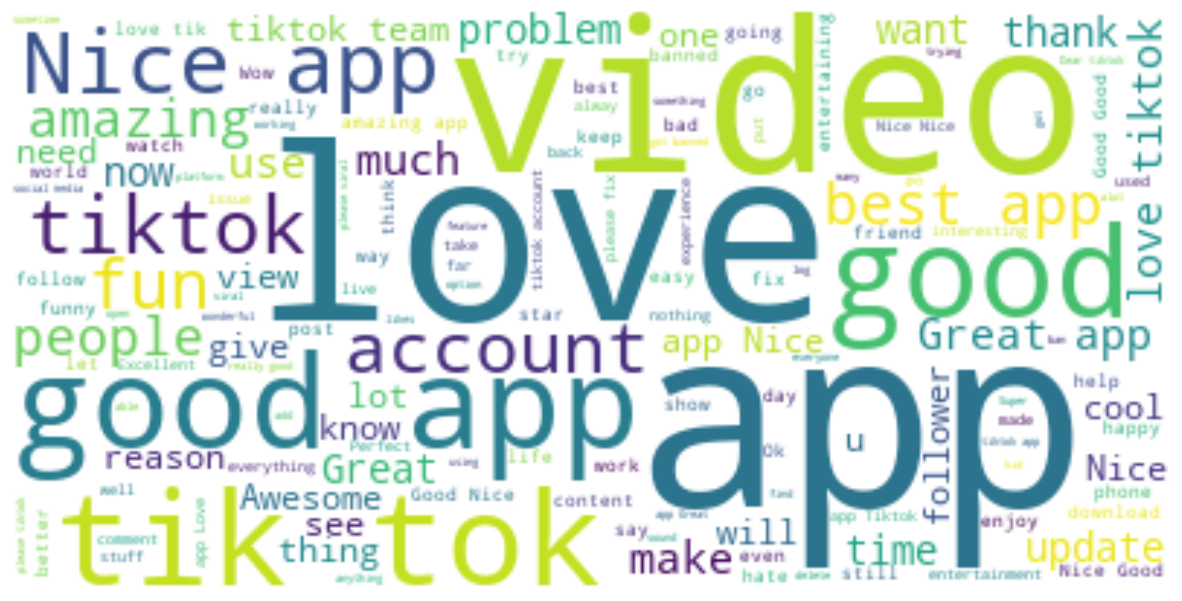

In [14]:
# Visualise most common words found in the dataset
text = " ".join(i for i in data.content)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [16]:
sentiment_dict_inv = {
    1:'positive',
    -1:'negative',
    0:'neutral'
}

bar_data = data.loc[:, ['content', 'sentiment']]
bar_data.head(10)

,content,sentiment
0,No words,1
1,Great fun app so far!,1
2,The app would get a higher rating but I litera...,-1
3,I WISH I COULD GIVE THIS A 100 PERCENT RATING ...,1
4,Pictures and record,1
5,I love this amazing app,1
6,Mohammed Rehan,1
7,Love being on Tik Tok.,1
8,Kwai pelo menos da dinheiro,-1
9,Post to view is such a step backwards for the ...,-1


In [17]:
bar_data['sentiment_name'] = bar_data['sentiment'].replace(sentiment_dict_inv)
bar_data.head()

,content,sentiment,sentiment_name
0,No words,1,positive
1,Great fun app so far!,1,positive
2,The app would get a higher rating but I litera...,-1,negative
3,I WISH I COULD GIVE THIS A 100 PERCENT RATING ...,1,positive
4,Pictures and record,1,positive


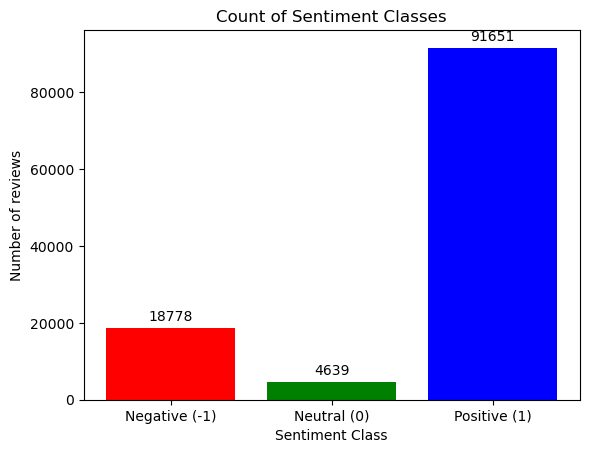

In [19]:
# Data
classes = ['Negative (-1)', 'Neutral (0)', 'Positive (1)']
support = [18778, 4639, 91651]

# Create the bar chart
plt.bar(classes, support, color=['red', 'green', 'blue'])
plt.xlabel('Sentiment Class')
plt.ylabel('Number of reviews')
plt.title('Count of Sentiment Classes')

# Annotate the bars with support values
for i in range(len(classes)):
    plt.text(classes[i], support[i] + 1000, str(support[i]), ha='center', va='bottom', fontsize=10)

plt.show()

In [15]:
# nltk.download('vader_lexicon')

# Sentiment Analysis on Processed data

## Rules based sentiment analysis

### Using textblob

It is a simple python library that offers API access to different NLP tasks such as sentiment analysis, spelling correction, etc.

Textblob sentiment analyzer returns two properties for a given input sentence: 

Polarity is a float that lies between [-1,1], -1 indicates negative sentiment and +1 indicates positive sentiments. 
Subjectivity is also a float which lies in the range of [0,1]. Subjective sentences generally refer to personal opinion, emotion, or judgment. 

Textblob will ignore the words that it doesn’t know, it will consider words and phrases that it can assign polarity to and averages to get the final score.

In [20]:
# import nltk
# nltk.download('punkt')
# from nltk.tokenize import word_tokenize
from nltk import pos_tag
# nltk.download('wordnet')
# from nltk.corpus import wordnet
# nltk.download('omw-1.4')
# nltk.download('averaged_perceptron_tagger')

In [21]:
data_text = data.loc[:, ['score', 'content', 'sentiment']]

In [22]:
# Remove emoji's from resulting cleaned text
data_text.loc[:,'clean_text'] = data_text['content'].apply(lambda x: clean(x, no_emoji=True))
data_text.loc[:,'clean_text'] = data_text['clean_text'].apply(clean_stuff)

In [23]:
data_text.head()

,score,content,sentiment,clean_text
0,5,No words,1,words
1,5,Great fun app so far!,1,great fun app far
2,1,The app would get a higher rating but I litera...,-1,app would get higher rating literally cant sig...
3,5,I WISH I COULD GIVE THIS A 100 PERCENT RATING ...,1,wish could give percent rating love
4,5,Pictures and record,1,pictures record


In [24]:
lemmatizer = WordNetLemmatizer()
def lemmatize(text):
    text = [lemmatizer.lemmatize(word) for word in text.split(' ')] # Reduce words to their stemmed form (results in list)
    text=" ".join(text) # Convert list to string ( or sentence)
    return text # Return cleaned text

data_text['Lemma'] = data_text['clean_text'].apply(lemmatize)
data_text.head()

,score,content,sentiment,clean_text,Lemma
0,5,No words,1,words,word
1,5,Great fun app so far!,1,great fun app far,great fun app far
2,1,The app would get a higher rating but I litera...,-1,app would get higher rating literally cant sig...,app would get higher rating literally cant sig...
3,5,I WISH I COULD GIVE THIS A 100 PERCENT RATING ...,1,wish could give percent rating love,wish could give percent rating love
4,5,Pictures and record,1,pictures record,picture record


In [25]:
data_text = data_text[['score', 'content', 'Lemma', 'sentiment']]
data_text.head()

,score,content,Lemma,sentiment
0,5,No words,word,1
1,5,Great fun app so far!,great fun app far,1
2,1,The app would get a higher rating but I litera...,app would get higher rating literally cant sig...,-1
3,5,I WISH I COULD GIVE THIS A 100 PERCENT RATING ...,wish could give percent rating love,1
4,5,Pictures and record,picture record,1


In [26]:
# function to calculate subjectivity
def getSubjectivity(review):
    return TextBlob(review).sentiment.subjectivity
    # function to calculate polarity
def getPolarity(review):
    return TextBlob(review).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [27]:
fin_data = pd.DataFrame(data_text[['content', 'Lemma']])
# fin_data['Subjectivity'] = fin_data['Lemma'].apply(getSubjectivity) 
fin_data['Polarity'] = fin_data['Lemma'].apply(getPolarity) 
fin_data['Analysis'] = fin_data['Polarity'].apply(analysis)
fin_data.head()

,content,Lemma,Polarity,Analysis
0,No words,word,0.000000,Neutral
1,Great fun app so far!,great fun app far,0.400000,Positive
2,The app would get a higher rating but I litera...,app would get higher rating literally cant sig...,0.097273,Positive
3,I WISH I COULD GIVE THIS A 100 PERCENT RATING ...,wish could give percent rating love,0.500000,Positive
4,Pictures and record,picture record,0.000000,Neutral


In [28]:
tb_counts = fin_data.Analysis.value_counts() / len(fin_data)

tb_counts

Positive    0.614301
Neutral     0.333397
Negative    0.052302
Name: Analysis, dtype: float64

### Using Vader 

Valence aware dictionary for sentiment reasoning (VADER) is another popular rule-based sentiment analyzer. 

It uses a list of lexical features (e.g. word) which are labeled as positive or negative according to their semantic orientation to calculate the text sentiment.   

Vader sentiment returns the probability of a given input sentence to be "Positive, negative, and neutral"

For example:

    “The food was great!”
    Positive : 99%
    Negative :1%
    Neutral : 0%

These three probabilities will add up to 100%.

The Compound score is a metric that calculates the sum of all the lexicon ratings which have been normalized between -1(most extreme negative) and +1 (most extreme positive).
- positive sentiment : (compound score >= 0.5) 
- neutral sentiment : (compound score > -0.5) and (compound score < 0.5) 
- negative sentiment : (compound score <= -0.5)

Vader is optimized for social media data and can yield good results when used with data from twitter, facebook, etc.

The main drawback with the rule-based approach for sentiment analysis is that the method only cares about individual words and completely ignores the context in which it is used. 

For example, “the party was savage” will be negative when considered by any token-based algorithms.

In [29]:
# Sentiment Analysis
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["content"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["content"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["content"]]
data['compound'] = [sentiments.polarity_scores(i)["compound"] for i in data["content"]]
# data = data[["content", "Positive", "Negative", "Neutral"]]
print(data.head())

                                             content  score  \
0                                           No words      5   
1                              Great fun app so far!      5   
2  The app would get a higher rating but I litera...      1   
3  I WISH I COULD GIVE THIS A 100 PERCENT RATING ...      5   
4                                Pictures and record      5   

                                   content_clean_lab  sentiment  Positive  \
0                                           No words          1     0.000   
1                              Great fun app so far!          1     0.719   
2  The app would get a higher rating but I litera...         -1     0.000   
3  I WISH I COULD GIVE THIS A 100 PERCENT RATING ...          1     0.561   
4                                Pictures and record          1     0.000   

   Negative  Neutral  compound  
0     0.688    0.312   -0.2960  
1     0.000    0.281    0.8268  
2     0.073    0.927   -0.6297  
3     0.000    0.439    0.

In [30]:
data.head()

,content,score,content_clean_lab,sentiment,Positive,Negative,Neutral,compound
0,No words,5,No words,1,0.000,0.688,0.312,-0.2960
1,Great fun app so far!,5,Great fun app so far!,1,0.719,0.000,0.281,0.8268
2,The app would get a higher rating but I litera...,1,The app would get a higher rating but I litera...,-1,0.000,0.073,0.927,-0.6297
3,I WISH I COULD GIVE THIS A 100 PERCENT RATING ...,5,I WISH I COULD GIVE THIS A 100 PERCENT RATING ...,1,0.561,0.000,0.439,0.8735
4,Pictures and record,5,Pictures and record,1,0.000,0.000,1.000,0.0000


In [31]:
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound <= -0.5 :
        return 'Negative'
    else:
        return 'Neutral'

In [32]:
data['Vader Analysis'] = data['compound'].apply(vader_analysis)
data.head()

,content,score,content_clean_lab,sentiment,Positive,Negative,Neutral,compound,Vader Analysis
0,No words,5,No words,1,0.000,0.688,0.312,-0.2960,Neutral
1,Great fun app so far!,5,Great fun app so far!,1,0.719,0.000,0.281,0.8268,Positive
2,The app would get a higher rating but I litera...,1,The app would get a higher rating but I litera...,-1,0.000,0.073,0.927,-0.6297,Negative
3,I WISH I COULD GIVE THIS A 100 PERCENT RATING ...,5,I WISH I COULD GIVE THIS A 100 PERCENT RATING ...,1,0.561,0.000,0.439,0.8735,Positive
4,Pictures and record,5,Pictures and record,1,0.000,0.000,1.000,0.0000,Neutral


## Machine learning based sentiment analysis

In the two approaches discussed as yet i.e. Text Blob and Vader, we have simply used Python libraries to perform sentiment analysis. Now we’ll discuss an approach wherein we’ll train our own model for the task. The steps involved in performing sentiment analysis using the Bag of Words Vectorization method are as follows:

Pre-Process the text of training data (Text pre-processing involves Normalization, Tokenization, Stopwords Removal, and Stemming/Lemmatization.)
Create a Bag of Words for the pre-processed text data using the Count Vectorization or TF-IDF Vectorization approach.
Train a suitable classification model on the processed data for sentiment classification.

### Using Multinomial Naive Bayes and Random Forest Approach

In [33]:
# take a look at the data
print(data_text.shape)
data_text.head()

(460271, 4)


,score,content,Lemma,sentiment
0,5,No words,word,1
1,5,Great fun app so far!,great fun app far,1
2,1,The app would get a higher rating but I litera...,app would get higher rating literally cant sig...,-1
3,5,I WISH I COULD GIVE THIS A 100 PERCENT RATING ...,wish could give percent rating love,1
4,5,Pictures and record,picture record,1


In [34]:
data_text.sentiment.value_counts() / len(data_text)

 1    0.796374
-1    0.163176
 0    0.040450
Name: sentiment, dtype: float64

In [35]:
# Instantiate and fit vectorizer object
cv = CountVectorizer(stop_words='english',ngram_range = (1,1))
text_counts = cv.fit_transform(data_text['Lemma'])

In [36]:
# Splitting data into train and text split for ML models
X_train, X_test, y_train, y_test = train_test_split(
    text_counts, data_text['sentiment'], test_size=0.25, random_state=5
)


# Splitting data into train and test for rule based models
X_train_rul, X_test_rul, y_train_rul, y_test_rul = train_test_split(
    data_text.drop(columns='sentiment'), data_text['sentiment'], test_size=0.25, random_state=5
)


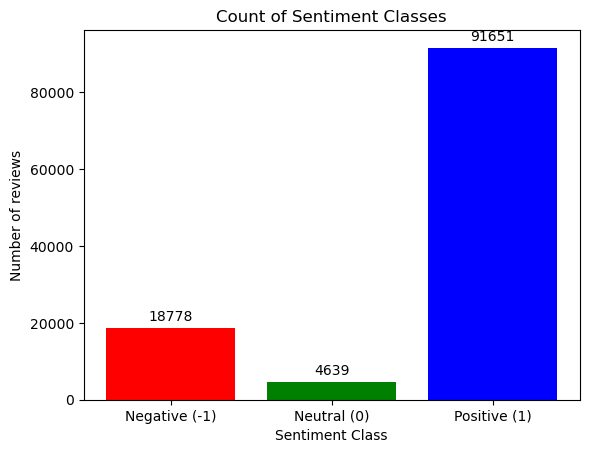

In [37]:
# Data
classes = ['Negative (-1)', 'Neutral (0)', 'Positive (1)']
support = [18778, 4639, 91651]

# Create the bar chart
plt.bar(classes, support, color=['red', 'green', 'blue'])
plt.xlabel('Sentiment Class')
plt.ylabel('Number of reviews')
plt.title('Count of Sentiment Classes')

# Annotate the bars with support values
for i in range(len(classes)):
    plt.text(classes[i], support[i] + 1000, str(support[i]), ha='center', va='bottom', fontsize=10)

plt.show()

In [38]:
# Create a downsampled training and test set as well to be used on the side
from imblearn.under_sampling import RandomUnderSampler

# Create the RandomUnderSampler instance
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)

# Fit and transform your training data (X_train and y_train)
X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)

In [39]:
#Training the model
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
mnb_no_sample = MNB.fit(X_train, y_train)

# training a model with the downsampled data as well
MNB = MultinomialNB()
mnb_sample = MNB.fit(X_resampled, y_resampled)



#Caluclating the accuracy score of the model
from sklearn import metrics
predicted_nosam = mnb_no_sample.predict(X_train)
predicted_sam = mnb_sample.predict(X_resampled)
print("Accuracy Score no sampling: ",metrics.accuracy_score(predicted_nosam, y_train))
print("Accuracy Score of undersampled set: ",metrics.accuracy_score(predicted_sam, y_resampled))

Accuracy Score no sampling:  0.851328059142012
Accuracy Score of undersampled set:  0.6429167560865107


In [40]:
#Training the model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=7)
rf_no_sample = rf.fit(X_train, y_train)


# training a model with the downsampled data as well
rf = RandomForestClassifier(n_estimators=100, max_depth=7)
rf_sample = rf.fit(X_resampled, y_resampled)



#Caluclating the accuracy score of the model
predicted_nosam = rf_no_sample.predict(X_train)
predicted_sam = rf_sample.predict(X_resampled)
print("Accuracy Score no sampling: ",metrics.accuracy_score(predicted_nosam, y_train))
print("Accuracy Score of undersampled set: ",metrics.accuracy_score(predicted_sam, y_resampled))

Accuracy Score no sampling:  0.7963343308140427
Accuracy Score of undersampled set:  0.5089300617593057


### Using LSTM based models (deep learning)

Though we were able to obtain a decent accuracy score with the Bag of Words Vectorization method, it might fail to yield the same results when dealing with larger datasets. This gives rise to the need to employ deep learning-based models for the training of the sentiment analysis model.

For NLP tasks we generally use RNN-based models since they are designed to deal with sequential data. Here, we’ll train an LSTM (Long Short Term Memory) model using TensorFlow with Keras. The steps to perform sentiment analysis using LSTM-based models are as follows:

    1. Pre-Process the text of training data (Text pre-processing involves Normalization, Tokenization, Stopwords Removal, and Stemming/Lemmatization.)
    
    2. Import Tokenizer from Keras.preprocessing.text and create its object. Fit the tokenizer on the entire training text (so that the Tokenizer gets trained on the training data vocabulary). Generated text embeddings using the texts_to_sequence() method of the Tokenizer and store them after padding them to an equal length. (Embeddings are numerical/vectorized representations of text. Since we cannot feed our model with the text data directly, we first need to convert them to embeddings)
    
    3. After having generated the embeddings we are ready to build the model. We build the model using TensorFlow — add Input, LSTM, and dense layers to it. Add dropouts and tune the hyperparameters to get a decent accuracy score. Generally, we tend to use ReLU or LeakyReLU activation functions in the inner layers of LSTM models as it avoids the vanishing gradient problem. At the output layer, we use Softmax or Sigmoid activation function.

In [43]:
# # Extracting reviews texts 
# review = data_text.Lemma.values

In [42]:
# #Tokenizing the texts(breaking into small parts)
# from tensorflow.keras.preprocessing.text import Tokenizer
# tokenizer = Tokenizer(num_words=5000)
# tokenizer.fit_on_texts(review)

# vocab_size = len(tokenizer.word_index) + 1

# # Replace words with essinged numbers using text to sequence
# encoded_docs = tokenizer.texts_to_sequences(review)

In [80]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

padded_sequence = pad_sequences(encoded_docs, maxlen=200)

#### Building the text Classifier

In [41]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
# from tensorflow.keras.layers import Embedding

# embedding_vector_length = 32
# num_classes = 3


# model = Sequential()
# model.add(Embedding(vocab_size, embedding_vector_length, input_length=200))
# model.add(SpatialDropout1D(0.25))
# model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
# model.add(Dropout(0.2))
# model.add(Dense(num_classes, activation='softmax'))
# model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

# print(model.summary())

In [44]:
# from tensorflow.keras.utils import to_categorical
# sentiments = data_text.sentiment.values
# one_hot_labels = to_categorical(sentiments, num_classes=num_classes)

In [45]:
# # Training the model
# history = model.fit(padded_sequence,one_hot_labels,validation_split=0.2, epochs=5, batch_size=32)

In [46]:
# # Save the model to a file (replace 'model_filename' with your desired filename)
# model.save('lstm_sentiment_modedl.keras')

In [47]:
# from tensorflow.keras.models import load_model

# # Load the saved model
# loaded_model = load_model('lstm_sentiment_modedl.keras')

# # # Now you can use 'loaded_model' for prediction
# # predictions = loaded_model.predict(new_data)


## 4 Testing the models on our test data

In [48]:
# Defining a function for testing the model
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report

def evaluate_sentiment_analysis(predictions, true_labels):
    """
    Evaluate sentiment analysis using Vader and TextBlob.
    
    Args:
        predictions (list): List of predicted sentiment labels.
        true_labels (list): List of true sentiment labels.
        
    Returns:
        accuracy (float): Accuracy of the sentiment analysis.
        precision (float): Precision score.
        recall (float): Recall score.
        f1_score (float): F1-score.
        classification_rep (str): Classification report.
    """
    
    # Calculate accuracy
    accuracy = accuracy_score(true_labels, predictions)
    
    # Calculate precision, recall, and F1-score
    precision, recall, f1_score, _ = precision_recall_fscore_support(true_labels, predictions, average='weighted')
    
    # Generate a classification report
    classification_rep = classification_report(true_labels, predictions)
    
    return accuracy, precision, recall, f1_score, classification_rep



def generate_results(predictions, true_labels):
    
    accuracy, precision, recall, f1_score, classification_rep = evaluate_sentiment_analysis(predictions, true_labels)
    
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score: {f1_score:.2f}")
    print("Classification Report:")
    print(classification_rep)


import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(predictions, true_labels):
    cm = confusion_matrix(true_labels, predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['-1', '0', '1'], yticklabels=['-1', '0', '1'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()


# Instantiating sentiment dictionary
sentiment_dict = {
    'positive': 1,
    'negative': -1,
    'neutral': 0
}

### 4.1 Testing rules based models

### 4.1.1 Testing Textblob model

In [49]:
import time
# Ground truth test data
test_data = y_test_rul
data_blob = pd.DataFrame(X_test_rul[['content', 'Lemma']])
print(data_blob.info())
data_blob.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115068 entries, 169080 to 356223
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   content  115068 non-null  object
 1   Lemma    115068 non-null  object
dtypes: object(2)
memory usage: 2.6+ MB
None


,content,Lemma
169080,To be honest there's nothing really that much ...,honest there nothing really much wrong app som...
406380,Amazong,amazong
225106,💖,
43878,Ta aplikacja to R A K,ta aplikacja r k
162936,Good,good
269987,Good app don't have too many problems but it g...,good app dont many problem glitch kick
163587,Hi tik tok team please check my account what p...,hi tik tok team please check account problem l...
63788,The message are not bing delivered properly......,message bing delivered properly message receiv...
192744,🤗,
12813,Followers tiktok,follower tiktok


In [50]:

start_time = time.time()
# Predicting on test

# fin_data['Subjectivity'] = fin_data['Lemma'].apply(getSubjectivity) 
data_blob['Polarity'] = data_blob['Lemma'].apply(getPolarity) 
data_blob['Analysis'] = data_blob['Polarity'].apply(analysis)
data_blob['actual_sentiment'] = y_test_rul
data_blob['sent_pred'] = data_blob['Analysis'].str.lower().replace(sentiment_dict)
prediction_time = time.time() - start_time
print(f'Prediction Time: {prediction_time}s')
data_blob.head(10)

Prediction Time: 13.40652084350586s


,content,Lemma,Polarity,Analysis,actual_sentiment,sent_pred
169080,To be honest there's nothing really that much ...,honest there nothing really much wrong app som...,0.0375,Positive,1,1
406380,Amazong,amazong,0.0000,Neutral,1,0
225106,💖,,0.0000,Neutral,1,0
43878,Ta aplikacja to R A K,ta aplikacja r k,0.0000,Neutral,0,0
162936,Good,good,0.7000,Positive,1,1
269987,Good app don't have too many problems but it g...,good app dont many problem glitch kick,0.6000,Positive,1,1
163587,Hi tik tok team please check my account what p...,hi tik tok team please check account problem l...,0.0000,Neutral,1,0
63788,The message are not bing delivered properly......,message bing delivered properly message receiv...,-0.1500,Negative,-1,-1
192744,🤗,,0.0000,Neutral,-1,0
12813,Followers tiktok,follower tiktok,0.0000,Neutral,1,0


In [51]:
generate_results(data_blob['sent_pred'], test_data)

Accuracy: 0.58
Precision: 0.80
Recall: 0.58
F1-score: 0.66
Classification Report:
              precision    recall  f1-score   support

          -1       0.61      0.19      0.29     18778
           0       0.04      0.36      0.08      4639
           1       0.87      0.67      0.76     91651

    accuracy                           0.58    115068
   macro avg       0.51      0.41      0.38    115068
weighted avg       0.80      0.58      0.66    115068



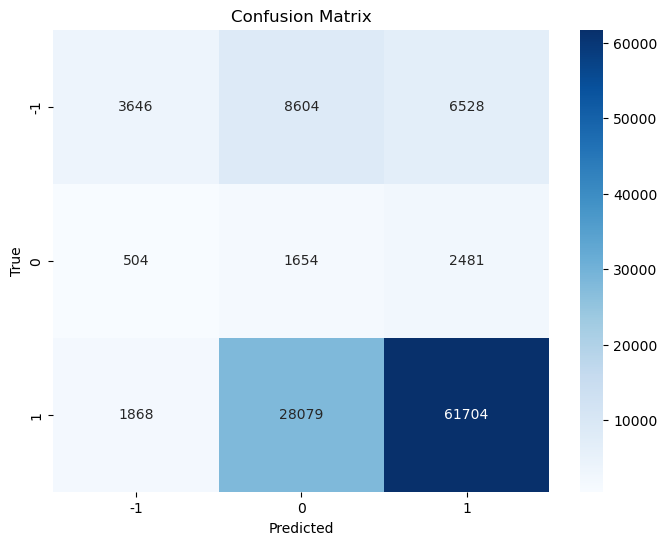

In [52]:
plot_confusion_matrix(data_blob['sent_pred'], test_data)

### 4.1.2 Testing Vader results

In [53]:
# Predicting on test
data_vad = pd.DataFrame(X_test_rul[['content', 'Lemma']])
# fin_data['Subjectivity'] = fin_data['Lemma'].apply(getSubjectivity) 
start_time = time.time()
data_vad["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data_vad["content"]]
data_vad["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data_vad["content"]]
data_vad["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data_vad["content"]]
data_vad['compound'] = [sentiments.polarity_scores(i)["compound"] for i in data_vad["content"]]
data_vad['Vader Analysis'] = data_vad['compound'].apply(vader_analysis)
data_vad['actual_sentiment'] = y_test_rul
data_vad['sent_analysis'] = data_vad['Vader Analysis'].str.lower().replace(sentiment_dict)
prediction_time = time.time() - start_time
print(f'Prediction Time: {prediction_time}s')
data_vad.head(10)


Prediction Time: 40.58357286453247s


,content,Lemma,Positive,Negative,Neutral,compound,Vader Analysis,actual_sentiment,sent_analysis
169080,To be honest there's nothing really that much ...,honest there nothing really much wrong app som...,0.041,0.175,0.784,-0.7917,Negative,1,-1
406380,Amazong,amazong,0.000,0.000,1.000,0.0000,Neutral,1,0
225106,💖,,0.000,0.000,0.000,0.0000,Neutral,1,0
43878,Ta aplikacja to R A K,ta aplikacja r k,0.000,0.000,1.000,0.0000,Neutral,0,0
162936,Good,good,1.000,0.000,0.000,0.4404,Neutral,1,0
269987,Good app don't have too many problems but it g...,good app dont many problem glitch kick,0.123,0.117,0.759,0.0258,Neutral,1,0
163587,Hi tik tok team please check my account what p...,hi tik tok team please check account problem l...,0.140,0.335,0.525,-0.6908,Negative,1,-1
63788,The message are not bing delivered properly......,message bing delivered properly message receiv...,0.000,0.000,1.000,0.0000,Neutral,-1,0
192744,🤗,,0.000,0.000,0.000,0.0000,Neutral,-1,0
12813,Followers tiktok,follower tiktok,0.000,0.000,1.000,0.0000,Neutral,1,0


In [54]:
generate_results(data_vad['sent_analysis'], test_data)

Accuracy: 0.36
Precision: 0.84
Recall: 0.36
F1-score: 0.47
Classification Report:
              precision    recall  f1-score   support

          -1       0.70      0.17      0.28     18778
           0       0.05      0.71      0.09      4639
           1       0.91      0.38      0.53     91651

    accuracy                           0.36    115068
   macro avg       0.55      0.42      0.30    115068
weighted avg       0.84      0.36      0.47    115068



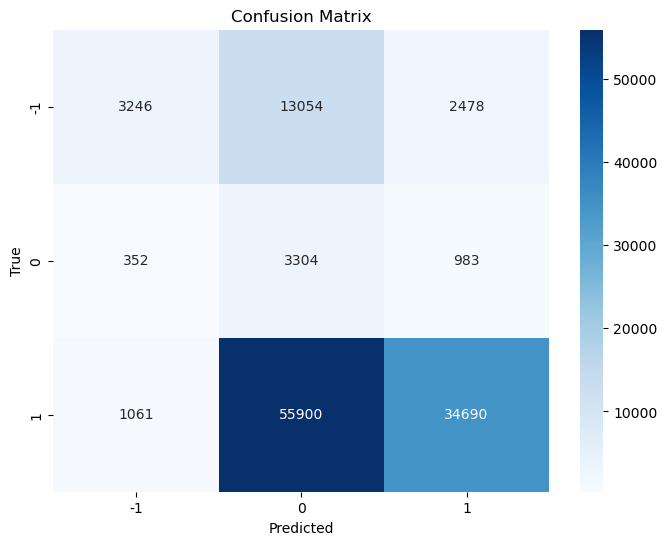

In [55]:
plot_confusion_matrix(data_vad['sent_analysis'], test_data)

### 4.2 Testing machine learning models

#### 4.2.1 Testing Naive based model

In [56]:
data_test = data_text.loc[y_test.index][['content','Lemma','sentiment']]
data_test.head()

,content,Lemma,sentiment
169080,To be honest there's nothing really that much ...,honest there nothing really much wrong app som...,1
406380,Amazong,amazong,1
225106,💖,,1
43878,Ta aplikacja to R A K,ta aplikacja r k,0
162936,Good,good,1


In [57]:
# Run predictions on dataset without sampling
start_time = time.time()
predicted_mnd = mnb_no_sample.predict(X_test)
prediction_time = time.time() - start_time

# Printing prediction time
print(f'Prediction Time: {prediction_time}s')
data_test_mnb = data_test.copy()
data_test_mnb['prediction'] = predicted_mnd

# Generate results
generate_results(predicted_mnd, y_test)

# Display predicted results
data_test_mnb.head(10)

Prediction Time: 0.010614156723022461s
Accuracy: 0.83
Precision: 0.80
Recall: 0.83
F1-score: 0.81
Classification Report:
              precision    recall  f1-score   support

          -1       0.64      0.45      0.52     18778
           0       0.08      0.02      0.03      4639
           1       0.87      0.95      0.91     91651

    accuracy                           0.83    115068
   macro avg       0.53      0.47      0.49    115068
weighted avg       0.80      0.83      0.81    115068



,content,Lemma,sentiment,prediction
169080,To be honest there's nothing really that much ...,honest there nothing really much wrong app som...,1,-1
406380,Amazong,amazong,1,1
225106,💖,,1,1
43878,Ta aplikacja to R A K,ta aplikacja r k,0,1
162936,Good,good,1,1
269987,Good app don't have too many problems but it g...,good app dont many problem glitch kick,1,1
163587,Hi tik tok team please check my account what p...,hi tik tok team please check account problem l...,1,1
63788,The message are not bing delivered properly......,message bing delivered properly message receiv...,-1,-1
192744,🤗,,-1,1
12813,Followers tiktok,follower tiktok,1,1


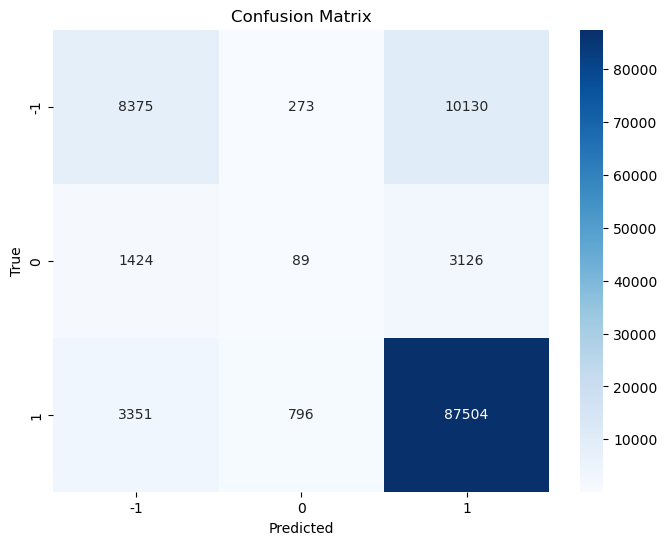

In [58]:
plot_confusion_matrix(predicted_mnd, y_test)

In [59]:
# Run predictions on dataset with sampling
start_time = time.time()
predicted_mnd_sampled = mnb_sample.predict(X_test)
prediction_time = time.time() - start_time

# Printing prediction time
print(f'Prediction Time: {prediction_time}s')
data_test_mnb_sam = data_test.copy()
data_test_mnb_sam['prediction'] = predicted_mnd_sampled

generate_results(predicted_mnd_sampled, y_test)


# Display predicted results
data_test_mnb_sam.head(10)

Prediction Time: 0.014623165130615234s
Accuracy: 0.62
Precision: 0.79
Recall: 0.62
F1-score: 0.68
Classification Report:
              precision    recall  f1-score   support

          -1       0.39      0.48      0.43     18778
           0       0.08      0.42      0.13      4639
           1       0.90      0.66      0.76     91651

    accuracy                           0.62    115068
   macro avg       0.46      0.52      0.44    115068
weighted avg       0.79      0.62      0.68    115068



,content,Lemma,sentiment,prediction
169080,To be honest there's nothing really that much ...,honest there nothing really much wrong app som...,1,0
406380,Amazong,amazong,1,1
225106,💖,,1,-1
43878,Ta aplikacja to R A K,ta aplikacja r k,0,1
162936,Good,good,1,1
269987,Good app don't have too many problems but it g...,good app dont many problem glitch kick,1,0
163587,Hi tik tok team please check my account what p...,hi tik tok team please check account problem l...,1,0
63788,The message are not bing delivered properly......,message bing delivered properly message receiv...,-1,0
192744,🤗,,-1,-1
12813,Followers tiktok,follower tiktok,1,-1


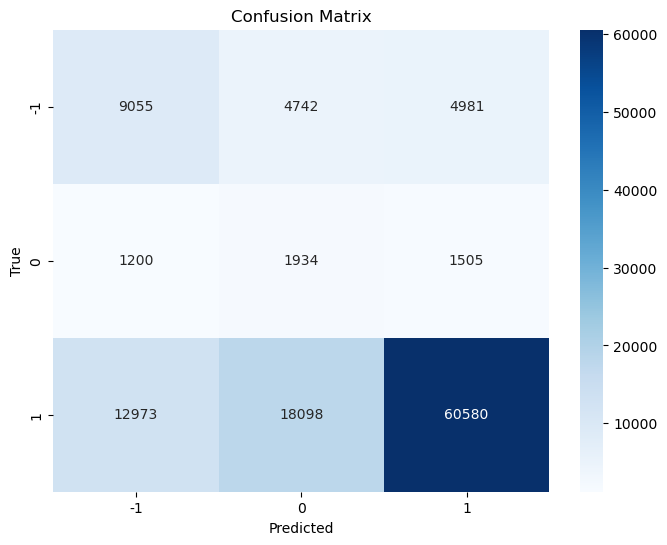

In [60]:
plot_confusion_matrix(predicted_mnd_sampled, y_test)

#### 4.2.2 Testing Random forest model

In [61]:
# Run predictions on dataset without sampling
start_time = time.time()
predicted_rf = rf_no_sample.predict(X_test)
prediction_time = time.time() - start_time

# Printing prediction time
print(f'Prediction Time: {prediction_time}s')
data_test_rf = data_test.copy()
data_test_rf['prediction'] = predicted_rf


generate_results(predicted_rf, y_test)


# Display predicted results
data_test_rf.head(10)

Prediction Time: 0.752286434173584s
Accuracy: 0.80
Precision: 0.63
Recall: 0.80
F1-score: 0.71
Classification Report:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00     18778
           0       0.00      0.00      0.00      4639
           1       0.80      1.00      0.89     91651

    accuracy                           0.80    115068
   macro avg       0.27      0.33      0.30    115068
weighted avg       0.63      0.80      0.71    115068



C:\Users\gsamu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\gsamu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\gsamu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\gsamu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero

,content,Lemma,sentiment,prediction
169080,To be honest there's nothing really that much ...,honest there nothing really much wrong app som...,1,1
406380,Amazong,amazong,1,1
225106,💖,,1,1
43878,Ta aplikacja to R A K,ta aplikacja r k,0,1
162936,Good,good,1,1
269987,Good app don't have too many problems but it g...,good app dont many problem glitch kick,1,1
163587,Hi tik tok team please check my account what p...,hi tik tok team please check account problem l...,1,1
63788,The message are not bing delivered properly......,message bing delivered properly message receiv...,-1,1
192744,🤗,,-1,1
12813,Followers tiktok,follower tiktok,1,1


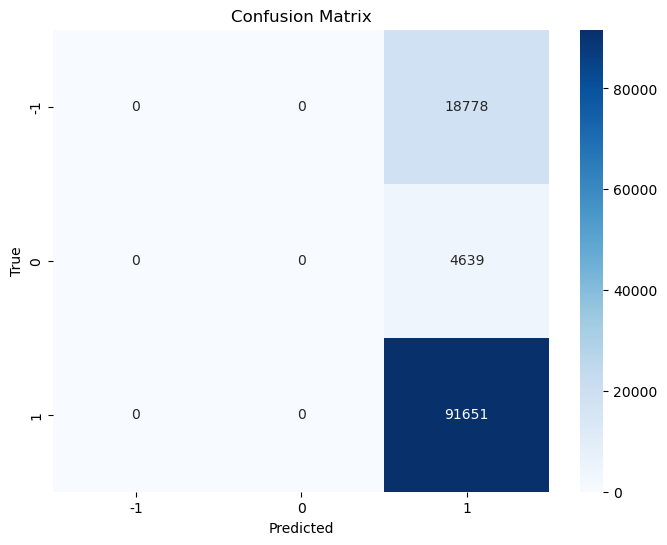

In [62]:
plot_confusion_matrix(predicted_rf, y_test)

In [63]:
# Run predictions on dataset with sampling
start_time = time.time()
predicted_rf_sampled = rf_sample.predict(X_test)
prediction_time = time.time() - start_time

# Printing prediction time
print(f'Prediction Time: {prediction_time}s')
data_test_rf_sam = data_test.copy()
data_test_rf_sam['prediction'] = predicted_rf_sampled


generate_results(predicted_rf_sampled, y_test)

# Display predicted results
data_test_rf_sam.head(10)

Prediction Time: 0.7398583889007568s
Accuracy: 0.78
Precision: 0.78
Recall: 0.78
F1-score: 0.77
Classification Report:
              precision    recall  f1-score   support

          -1       0.53      0.34      0.41     18778
           0       0.12      0.23      0.16      4639
           1       0.87      0.89      0.88     91651

    accuracy                           0.78    115068
   macro avg       0.51      0.49      0.48    115068
weighted avg       0.78      0.78      0.77    115068



,content,Lemma,sentiment,prediction
169080,To be honest there's nothing really that much ...,honest there nothing really much wrong app som...,1,0
406380,Amazong,amazong,1,1
225106,💖,,1,1
43878,Ta aplikacja to R A K,ta aplikacja r k,0,1
162936,Good,good,1,1
269987,Good app don't have too many problems but it g...,good app dont many problem glitch kick,1,0
163587,Hi tik tok team please check my account what p...,hi tik tok team please check account problem l...,1,0
63788,The message are not bing delivered properly......,message bing delivered properly message receiv...,-1,1
192744,🤗,,-1,1
12813,Followers tiktok,follower tiktok,1,1


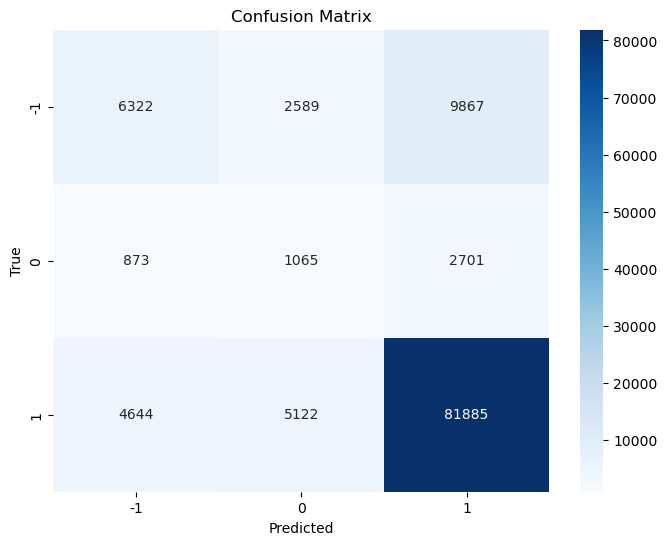

In [64]:
plot_confusion_matrix(predicted_rf_sampled, y_test)